<a href="https://colab.research.google.com/github/LindaMjw/Case-Study/blob/main/fixed_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
! git clone -q https://github.com/LindaMjw/project_voting

fatal: destination path 'project_voting' already exists and is not an empty directory.


In [54]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

vdf = pd.read_csv('/content/project_voting/data/voting_VA.csv') # Load historical voting data

## DATA

In [55]:
print(vdf)

      Unnamed: 0  year     state state_po      county_name  county_fips  \
0          11161  2000  VIRGINIA       VA         ACCOMACK        51001   
1          11162  2000  VIRGINIA       VA         ACCOMACK        51001   
2          11163  2000  VIRGINIA       VA         ACCOMACK        51001   
3          11164  2000  VIRGINIA       VA         ACCOMACK        51001   
4          11165  2000  VIRGINIA       VA        ALBEMARLE        51003   
...          ...   ...       ...      ...              ...          ...   
3731       71966  2020  VIRGINIA       VA  WINCHESTER CITY        51840   
3732       71967  2020  VIRGINIA       VA  WINCHESTER CITY        51840   
3733       71968  2020  VIRGINIA       VA  WINCHESTER CITY        51840   
3734       71969  2020  VIRGINIA       VA  WINCHESTER CITY        51840   
3735       71970  2020  VIRGINIA       VA  WINCHESTER CITY        51840   

            office       candidate       party  candidatevotes  totalvotes  \
0     US PRESIDENT   

In [24]:
print(vdf.describe())

         Unnamed: 0         year   county_fips  candidatevotes     totalvotes  \
count   3736.000000  3736.000000   3736.000000     3736.000000    3736.000000   
mean   47061.027837  2012.826552  51264.579229     5878.282120   29116.353587   
std    23219.785408     7.589036    270.546458    18452.435802   58562.057257   
min    11161.000000  2000.000000  51001.000000        0.000000       0.000000   
25%    21235.750000  2004.000000  51069.000000       59.000000    6741.500000   
50%    49016.500000  2016.000000  51139.000000      899.000000   11629.000000   
75%    71036.250000  2020.000000  51550.000000     4548.250000   24520.750000   
max    71970.000000  2020.000000  51840.000000   355133.000000  601243.000000   

          version  
count      3736.0  
mean   20220315.0  
std           0.0  
min    20220315.0  
25%    20220315.0  
50%    20220315.0  
75%    20220315.0  
max    20220315.0  


> There is no missing values in virginia voting data, nor missing values in the other two map data.

In [76]:
print(vdf['mode'].unique())

['TOTAL' 'ABSENTEE' 'ELECTION DAY' 'PROVISIONAL']


In [78]:
# make a copy of vdf, so that the operation on vdf1 won't influence the original dataset
vdf1 = vdf.copy()
# group the county that vote in different mode that is not in total (in the other word, add candidate votes in mode 'ABSENTEE' 'ELECTION DAY' 'PROVISIONAL')
vdf1 = vdf1.groupby(['year', 'party','county_name','totalvotes'])['candidatevotes'].sum().reset_index()
# group by year and party to get sum of candidates vote and total votes.
vdf1 = vdf1.groupby(['year', 'party'])[['candidatevotes', 'totalvotes']].sum().reset_index()
# calculate the percentage votes
vdf1['percentage_votes'] = vdf1['candidatevotes'] / vdf1['totalvotes']


print(vdf1)

    year        party  candidatevotes  totalvotes  percentage_votes
0   2000     DEMOCRAT         1216422     2737915          0.444288
1   2000        GREEN           59373     2737915          0.021685
2   2000        OTHER           25243     2737915          0.009220
3   2000   REPUBLICAN         1436877     2737915          0.524807
4   2004     DEMOCRAT         1454742     3198367          0.454839
5   2004        OTHER           26666     3198367          0.008337
6   2004   REPUBLICAN         1716959     3198367          0.536824
7   2008     DEMOCRAT         1959532     3723260          0.526295
8   2008        OTHER           38723     3723260          0.010400
9   2008   REPUBLICAN         1725005     3723260          0.463305
10  2012     DEMOCRAT         1971820     3854489          0.511565
11  2012        OTHER           60147     3854489          0.015604
12  2012   REPUBLICAN         1822522     3854489          0.472831
13  2016     DEMOCRAT         1981473     398463

> By oberseving the numeric percentage votes value, we can predict that Libertrian and Green party won't appear on density plot since they only occur on 2000 and 2020 respectively.

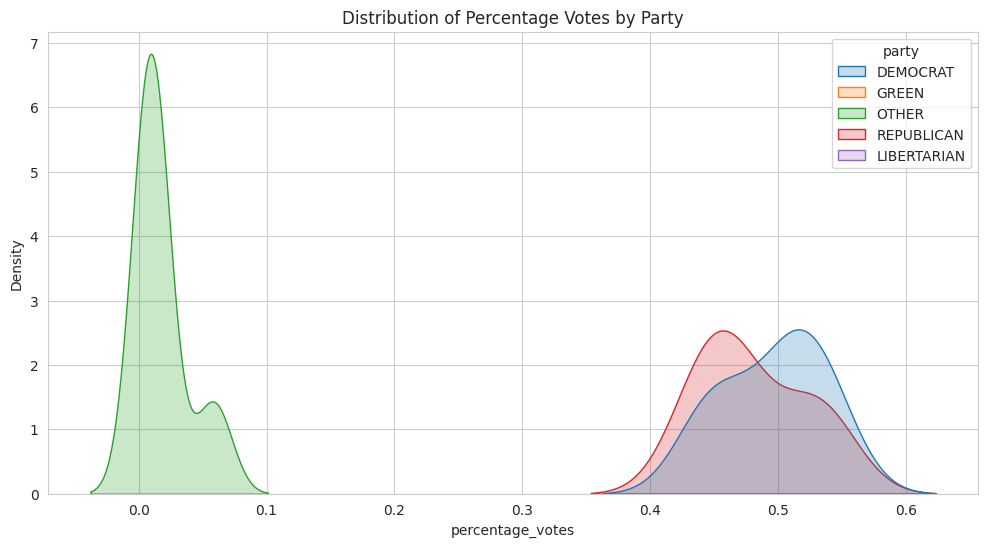

In [79]:
# Set the style of the plot
sns.set_style("whitegrid")
# Create a kernel density plot for each party
plt.figure(figsize=(12, 6))
sns.kdeplot(data=vdf1, x='percentage_votes', hue='party', fill=True, warn_singular=False)
plt.title('Distribution of Percentage Votes by Party')
plt.show()

> This data provides insight into the distribution and variation of 'percentage_votes' for each 'party' over time. The Green Party's percentage of votes is relatively low compared to the other two parties and remains consistent over time. The percentage of votes for the Democratic Party is  close to that of the Republican Party. But the higher density of Democratic votes around 0.55 suggests that the Democratic Party has won more times in Virginia in the past six elections. THe Republican's percentage vote has a hgiher density at 0.45. By checking the real election results, we can see that the Republican Party won in 2000 and 2004, while the Democratic Party emerged victorious in the remaining four elections.

## Analysis

In [27]:
county_12 = pd.read_csv('/content/project_voting/data/county_data/0002_ds191_20125_county_E.csv')
print(county_12.head())

   Unnamed: 0              GISJOIN            YEAR                     STUSAB  \
0           1  GIS Join Match Code  Data File Year  State Postal Abbreviation   
1           2             G0100010       2008-2012                         AL   
2           3             G0100030       2008-2012                         AL   
3           4             G0100050       2008-2012                         AL   
4           5             G0100070       2008-2012                         AL   

       REGIONA      DIVISIONA       STATE      STATEA          COUNTY  \
0  Region Code  Division Code  State Name  State Code     County Name   
1          NaN            NaN     Alabama          01  Autauga County   
2          NaN            NaN     Alabama          01  Baldwin County   
3          NaN            NaN     Alabama          01  Barbour County   
4          NaN            NaN     Alabama          01     Bibb County   

       COUNTYA  ...             QXSE007 QX6E001 QX7E001   QX7E002 QX7E003 

In [28]:
# select county, [QU1E001]Median Household Income in the Past 12 Months(in 2012 Inflation-Adjusted Dollars)
# Race: [QSQE002] White alone, [QSQE003] Black or African American alone
selected_columns = ["COUNTY"] + [col for col in county_12.columns if col in ["QU1E001", "QSQE002", "QSQE003"]]
# Select the columns from the DataFrame
county12_sel = county_12[county_12['STATE'] == 'Virginia']
county12_sel = county12_sel[selected_columns]
county12_sel.insert(0, 'year', 2012)
print(county12_sel.head())

      year            COUNTY QSQE002 QSQE003 QU1E001
2821  2012   Accomack County   22586    9620   40780
2822  2012  Albemarle County   81403    9751   67797
2823  2012  Alleghany County   15210     801   46133
2824  2012     Amelia County    9219    3052   50596
2825  2012    Amherst County   24630    6083   45020


In [29]:
# Rename the remaining columns
county12_sel.rename(columns={'QSQE002': 'white', 'QSQE003': 'black/AA', 'QU1E001': 'Median Household Income'}, inplace=True)
# Print the DataFrame to verify changes
print(county12_sel.head())

      year            COUNTY  white black/AA Median Household Income
2821  2012   Accomack County  22586     9620                   40780
2822  2012  Albemarle County  81403     9751                   67797
2823  2012  Alleghany County  15210      801                   46133
2824  2012     Amelia County   9219     3052                   50596
2825  2012    Amherst County  24630     6083                   45020


In [30]:
county_16 = pd.read_csv('/content/project_voting/data/county_data/0002_ds225_20165_county_E.csv')
county_20 = pd.read_csv('/content/project_voting/data/county_data/0002_ds249_20205_county_E.csv')

<ipython-input-30-807815cecaed>:2: DtypeWarning: Columns (4,5,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,26

In [31]:
selected_columns = ["COUNTY"] + [col for col in county_16.columns if col in ["AF49E001", "AF2ME002", "AF2ME003"]]
county16_sel = county_16[county_16['STATE'] == 'Virginia']
county16_sel = county16_sel[selected_columns]
county16_sel.rename(columns={'AF2ME002': 'white', 'AF2ME003': 'black/AA', 'AF49E001': 'Median Household Income'}, inplace=True)
county16_sel.insert(0, 'year', 2016)
print(county16_sel)

      year               COUNTY   white black/AA Median Household Income
2821  2016      Accomack County   22369     9573                   38503
2822  2016     Albemarle County   84955     9747                   70342
2823  2016     Alleghany County   14745      829                   45538
2824  2016        Amelia County    9389     3010                   58269
2825  2016       Amherst County   24609     5717                   47002
...    ...                  ...     ...      ...                     ...
2949  2016         Suffolk city   45514    36522                   65435
2950  2016  Virginia Beach city  304213    85906                   67719
2951  2016      Waynesboro city   17478     2702                   45097
2952  2016    Williamsburg city   11207     2223                   50091
2953  2016      Winchester city   22131     2642                   46466

[133 rows x 5 columns]


In [32]:
selected_columns = ["COUNTY"] + [col for col in county_20.columns if col in ["AMR8E001", "AMPWE002", "AMPWE003"]]
county20_sel = county_20[county_20['STATE'] == 'Virginia']
county20_sel = county20_sel[selected_columns]
county20_sel.rename(columns={'AMPWE002': 'white', 'AMPWE003': 'black/AA', 'AMR8E001': 'Median Household Income'}, inplace=True)
county20_sel.insert(0, 'year', 2020)
print(county20_sel)

      year               COUNTY   white black/AA Median Household Income
2822  2020      Accomack County   21773     9390                 46178.0
2823  2020     Albemarle County   87871    10005                 84643.0
2824  2020     Alleghany County   13925      790                 48513.0
2825  2020        Amelia County    9789     2876                 63918.0
2826  2020       Amherst County   24330     5758                 57368.0
...    ...                  ...     ...      ...                     ...
2950  2020         Suffolk city   46250    37869                 79899.0
2951  2020  Virginia Beach city  293359    84851                 78136.0
2952  2020      Waynesboro city   17890     2797                 43480.0
2953  2020    Williamsburg city   10773     2285                 59288.0
2954  2020      Winchester city   21617     2794                 61102.0

[133 rows x 5 columns]


In [33]:
merged_data = pd.concat([county12_sel, county16_sel, county20_sel], ignore_index=True)

In [34]:
merged_data['COUNTY'] = merged_data['COUNTY'].str.upper()
merged_data['COUNTY'] = merged_data['COUNTY'].apply(lambda x: x[:-12] if x.endswith(' CITY COUNTY') else (x[:-7] if x.endswith(' COUNTY') else (x[:-5] if x.endswith(' CITY') else x)))
print(merged_data)

     year          COUNTY   white black/AA Median Household Income
0    2012        ACCOMACK   22586     9620                   40780
1    2012       ALBEMARLE   81403     9751                   67797
2    2012       ALLEGHANY   15210      801                   46133
3    2012          AMELIA    9219     3052                   50596
4    2012         AMHERST   24630     6083                   45020
..    ...             ...     ...      ...                     ...
395  2020         SUFFOLK   46250    37869                 79899.0
396  2020  VIRGINIA BEACH  293359    84851                 78136.0
397  2020      WAYNESBORO   17890     2797                 43480.0
398  2020    WILLIAMSBURG   10773     2285                 59288.0
399  2020      WINCHESTER   21617     2794                 61102.0

[400 rows x 5 columns]


In [81]:
vdf = vdf.groupby(['year', 'party','county_name','totalvotes'])['candidatevotes'].sum().reset_index()
vdf['percentage_votes'] = vdf['candidatevotes'] / vdf['totalvotes']
print(vdf)

      year       party        county_name  totalvotes  candidatevotes  \
0     2000    DEMOCRAT           ACCOMACK       11925            5092   
1     2000    DEMOCRAT          ALBEMARLE       36846           16255   
2     2000    DEMOCRAT         ALEXANDRIA       55199           33633   
3     2000    DEMOCRAT          ALLEGHANY        5123            2214   
4     2000    DEMOCRAT             AMELIA        4788            1754   
...    ...         ...                ...         ...             ...   
2671  2020  REPUBLICAN  WILLIAMSBURG CITY        6890            1963   
2672  2020  REPUBLICAN    WINCHESTER CITY       12113            5221   
2673  2020  REPUBLICAN               WISE       16615           13366   
2674  2020  REPUBLICAN              WYTHE       15073           11733   
2675  2020  REPUBLICAN               YORK       38791           20241   

      percentage_votes  
0             0.427002  
1             0.441161  
2             0.609305  
3             0.432169 

In [87]:
dem = vdf[vdf['party'] == 'DEMOCRAT'].copy()
dem['percentage_votes'] = dem['candidatevotes'] / dem['totalvotes'] *100

dem.rename(columns={'county_name': 'COUNTY'}, inplace=True)
dem['COUNTY'] = dem['COUNTY'].apply(lambda x: x[:-5] if x.endswith(' CITY') else x)
dem = dem.iloc[:, [0, 2, 5]]  # Columns county, year, and percentage vote
print(dem)

      year        COUNTY  percentage_votes
0     2000      ACCOMACK         42.700210
1     2000     ALBEMARLE         44.116051
2     2000    ALEXANDRIA         60.930452
3     2000     ALLEGHANY         43.216865
4     2000        AMELIA         36.633250
...    ...           ...               ...
2272  2020  WILLIAMSBURG         69.521045
2273  2020    WINCHESTER         54.569471
2274  2020          WISE         18.718026
2275  2020         WYTHE         20.851854
2276  2020          YORK         45.585316

[803 rows x 3 columns]


In [88]:
final_df = pd.merge(merged_data, dem, on=['year', 'COUNTY'], how='left')

In [89]:
duplicate_keys = dem.duplicated(subset=['year', 'COUNTY'], keep=False)
print("Duplicate keys in dem:")
print(dem[duplicate_keys])
# after read into the data wp and google, we fould out the following COUNTY has both COUNTY and city (ex. FAIRFAX county and FAIRFAX city)
# it will be mroe complicated if we go back and fix the extire data for this 8 county, so we plan to excluded them.

Duplicate keys in dem:
      year    COUNTY  percentage_votes
10    2000   BEDFORD         44.162229
11    2000   BEDFORD         31.205782
38    2000   FAIRFAX         45.636249
39    2000   FAIRFAX         47.489819
44    2000  FRANKLIN         55.249138
45    2000  FRANKLIN         37.946784
105   2000  RICHMOND         36.486945
106   2000  RICHMOND         64.795377
107   2000   ROANOKE         53.585312
108   2000   ROANOKE         37.697643
546   2004   BEDFORD         40.991345
547   2004   BEDFORD         28.983569
574   2004   FAIRFAX         51.156837
575   2004   FAIRFAX         53.247114
580   2004  FRANKLIN         54.015837
581   2004  FRANKLIN         36.007740
641   2004  RICHMOND         36.983041
642   2004  RICHMOND         70.187689
643   2004   ROANOKE         52.394444
644   2004   ROANOKE         34.236689
948   2008   BEDFORD         44.184345
949   2008   BEDFORD         30.747977
976   2008   FAIRFAX         57.685559
977   2008   FAIRFAX         60.117500
98

In [94]:
# List of county names to exclude
exclude_counties = ["FAIRFAX", "FRANKLIN", "RICHMOND", "ROANOKE","BEDFORD"]

# Filter out rows where the county column is not in the exclude_counties list
final_df = final_df[~final_df['COUNTY'].isin(exclude_counties)]

0.49219764959192047


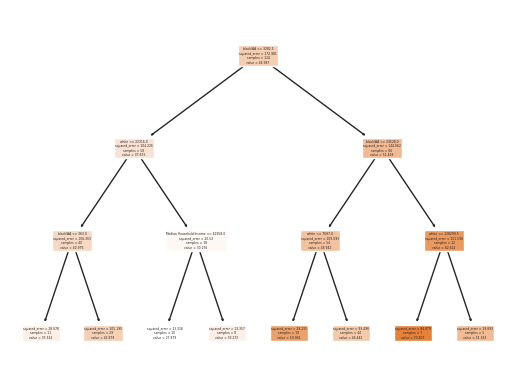

In [98]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Training data for years 2012 and 2016
X_train = final_df[(final_df['year'] == 2012)].drop(['percentage_votes', 'year', 'COUNTY'], axis=1)
y_train = final_df[(final_df['year'] == 2012)]['percentage_votes']

# Testing data for year 2020
X_test = final_df[final_df['year'] == 2016].drop(['percentage_votes', 'year', 'COUNTY'], axis=1)
y_test = final_df[final_df['year'] == 2016]['percentage_votes']

# Fit model:
model = DecisionTreeRegressor(max_depth=3)
tree = model.fit(X_train,y_train)
y_hat = tree.predict(X_test) # Model predictions
SSE = np.sum( (y_test - y_hat)**2 )
TSS = np.sum( (y_test - np.mean(y_train) )**2 )
rsq = 1 - SSE/TSS
print(rsq)
plot_tree(tree,filled=True,feature_names=tree.feature_names_in_ )
plt.show()